

---


Import Library & Dataset

---



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
nlp = spacy.load("en_core_web_sm")

import os
for dirname, _, filenames in os.walk('/content/threads_reviews.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.model_selection import train_test_split



---


Menampilkan dataset

---



In [ ]:
df = pd.read_csv('/content/threads_reviews.csv')
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
col = ['review_description', 'rating']
df = df[col]

df.isnull().sum()

review_description    0
rating                0
dtype: int64



---

EDA

---



In [ ]:
df_counts = df["rating"].value_counts().reset_index()
df_counts.head()

,index,rating
0,5,15559
1,1,9726
2,4,3244
3,3,2585
4,2,1796


In [ ]:
df_counts["index"] = df_counts["index"].apply(lambda x: 'Very Satisfied' if x == 5.0 else 'Satisfied' if x == 4.0 else 'Neutral' if x == 3.0 else 'Dissatisfied' if x == 2.0 else 'Very Dissatisfied')
df_counts.head()

,index,rating
0,Very Satisfied,15559
1,Very Dissatisfied,9726
2,Satisfied,3244
3,Neutral,2585
4,Dissatisfied,1796


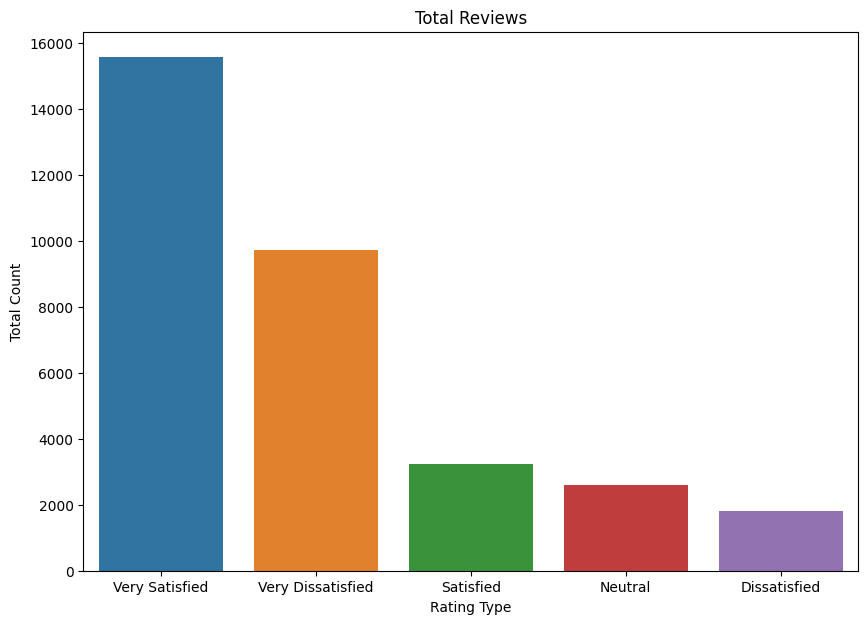

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts, x='index', y='rating')
plt.xlabel("Rating Type");
plt.ylabel("Total Count");
plt.title("Total Reviews");

In [ ]:
empty_review_index = []
for i, review_description, rating in df.itertuples():
    # if review type is string
    if type(review_description) == str:
        #if review is empty space
        if review_description.isspace():
            # Appent its index to the list
            empty_review_index.append(i)

In [ ]:
empty_review_index # So we do not have any empty review

[]


Positive & Negative Token Count & Frequency Distribution

In [ ]:
import re # for regular expression

In [ ]:
verysatisfied_token = [] # to save very satisfied tokens
satisfied_token = [] # to save satisfied tokens
neutral_token = [] # to save neutral tokens
dissatisfied_token = [] # to save very dissatisfied tokens
verydissatisfied_token = [] # to save dissatisfied tokens
corpus=[]
noun = []
def process_review_description(df):
    for index, review_description, rating in df.itertuples():
        if type(review_description) == str:
            review_description = re.sub('[^a-zA-Z]', ' ', review_description)
            review_description = review_description.lower()
            doc = nlp(review_description)
            temp = []
            for token in doc:
                if not token.text.isspace():
                    if not token.is_stop and len(token.text) > 5:
                        if token.pos_ == 'NOUN':
                            noun.append(token.text)
                        if rating == 5:
                            verysatisfied_token.append(token.text)
                        elif rating == 4:
                            satisfied_token.append(token.text)
                        elif rating == 3:
                            neutral_token.append(token.text)
                        elif rating == 2:
                            dissatisfied_token.append(token.text)
                        else:
                            verydissatisfied_token.append(token.text)
                        temp.append(token.lemma_)
                        corpus.append(' '.join(temp))

In [ ]:
process_review_description(df)

In [ ]:
verysatisfied_token[0:10]

['launch',
 'improvements',
 'trending',
 'longer',
 'videos',
 'button',
 'threads',
 'uploaded',
 'improve',
 'loading']

In [ ]:
satisfied_token[0:10]

['handful',
 'unsolicited',
 'requests',
 'despatch',
 'flowing',
 'conversation',
 'moderate',
 'social',
 'freezing',
 'issues']

In [ ]:
neutral_token[0:10]

['pretty',
 'launch',
 'explanatory',
 'algorithm',
 'potential',
 'things',
 'improvement',
 'ability',
 'hashtags',
 'easier']

In [ ]:
dissatisfied_token[0:10]

['greatest',
 'experience',
 'chromebook',
 'customized',
 'phones',
 'little',
 'screen',
 'expand',
 'resize',
 'reasons']

In [ ]:
verydissatisfied_token[0:10]

['content',
 'people',
 'specifically',
 'follow',
 'explicitly',
 'search',
 'search',
 'option',
 'complete',
 'searches']

In [ ]:
from nltk import FreqDist

In [ ]:
freq_verysatisfied = FreqDist(verysatisfied_token)
freq_satisfied = FreqDist(satisfied_token)
freq_neutral = FreqDist(neutral_token)
freq_dissatisfied = FreqDist(dissatisfied_token)
freq_verydissatisfied = FreqDist(verydissatisfied_token)

In [ ]:
freq_verysatisfied

FreqDist({'twitter': 2288, 'better': 1023, 'threads': 885, 'instagram': 635, 'amazing': 545, 'awesome': 297, 'application': 296, 'experience': 287, 'review': 241, 'features': 236, ...})

In [ ]:
freq_satisfied

FreqDist({'twitter': 607, 'threads': 474, 'instagram': 350, 'better': 214, 'people': 210, 'follow': 194, 'features': 183, 'option': 167, 'accounts': 146, 'account': 135, ...})

In [ ]:
freq_neutral

FreqDist({'twitter': 481, 'threads': 401, 'instagram': 360, 'people': 348, 'follow': 317, 'option': 196, 'account': 191, 'accounts': 164, 'thread': 147, 'following': 141, ...})

In [ ]:
freq_dissatisfied

FreqDist({'twitter': 371, 'instagram': 309, 'threads': 301, 'people': 275, 'follow': 265, 'account': 173, 'thread': 134, 'accounts': 119, 'option': 100, 'following': 84, ...})

In [ ]:
freq_verydissatisfied

FreqDist({'twitter': 2062, 'instagram': 1623, 'account': 1260, 'threads': 966, 'delete': 584, 'people': 515, 'follow': 429, 'better': 348, 'working': 262, 'thread': 261, ...})

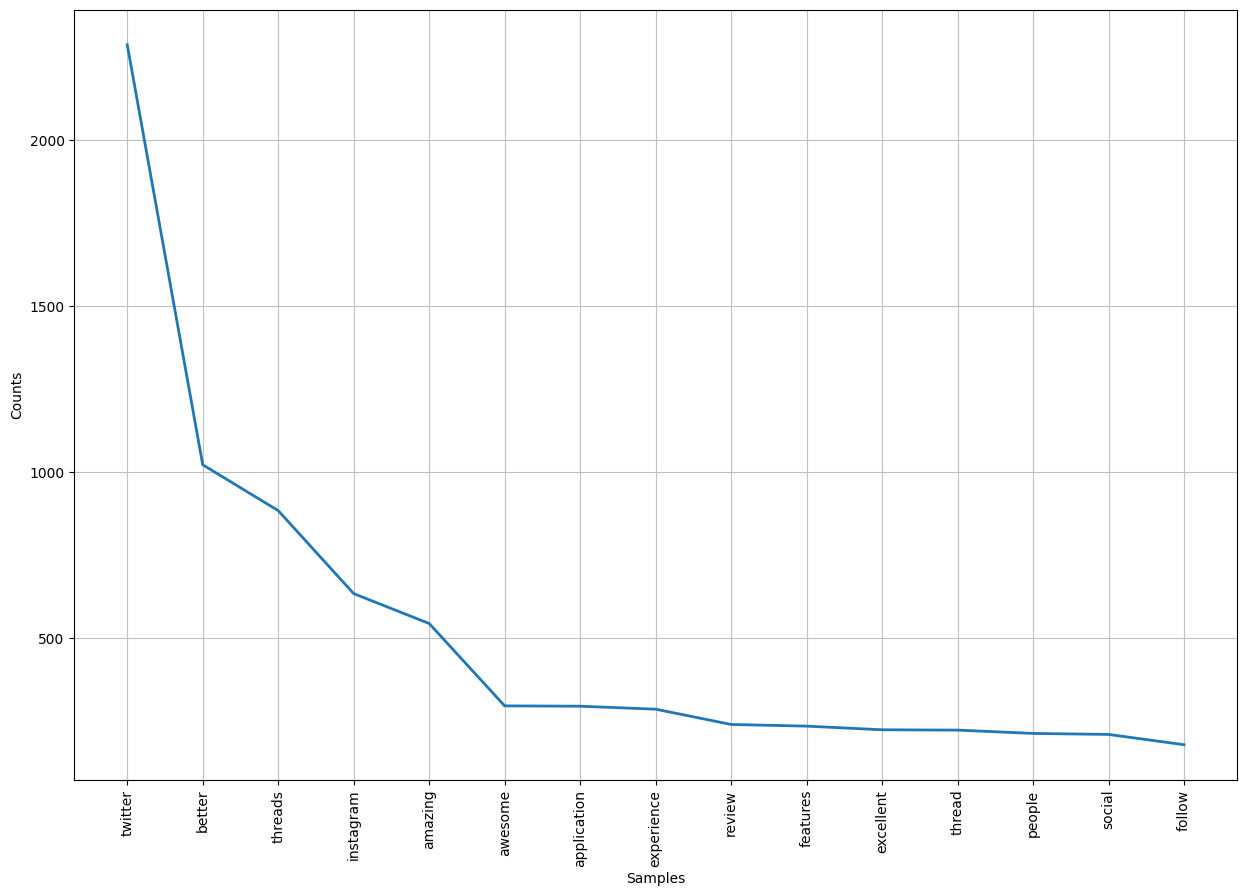

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize=(15, 10))
freq_verysatisfied.plot(15)

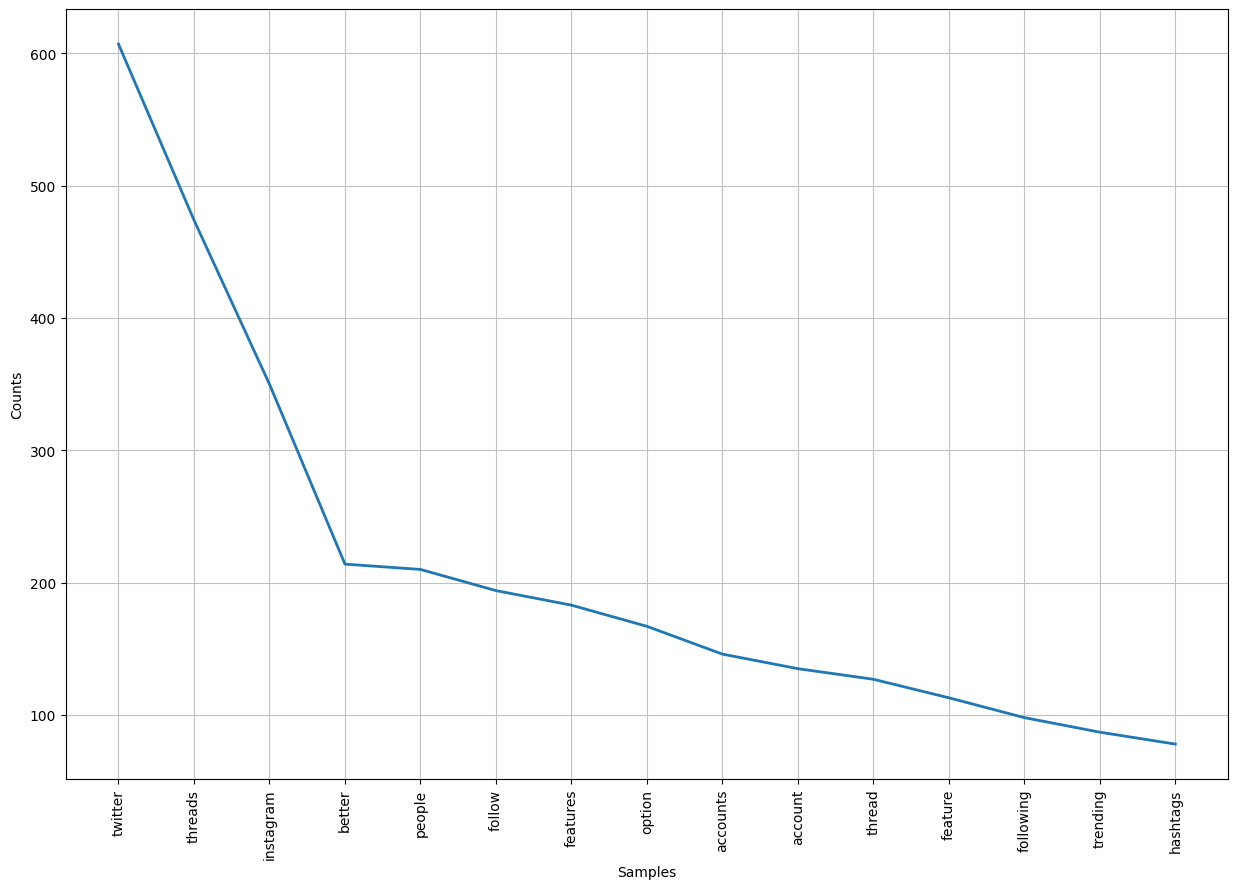

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize=(15, 10))
freq_satisfied.plot(15)

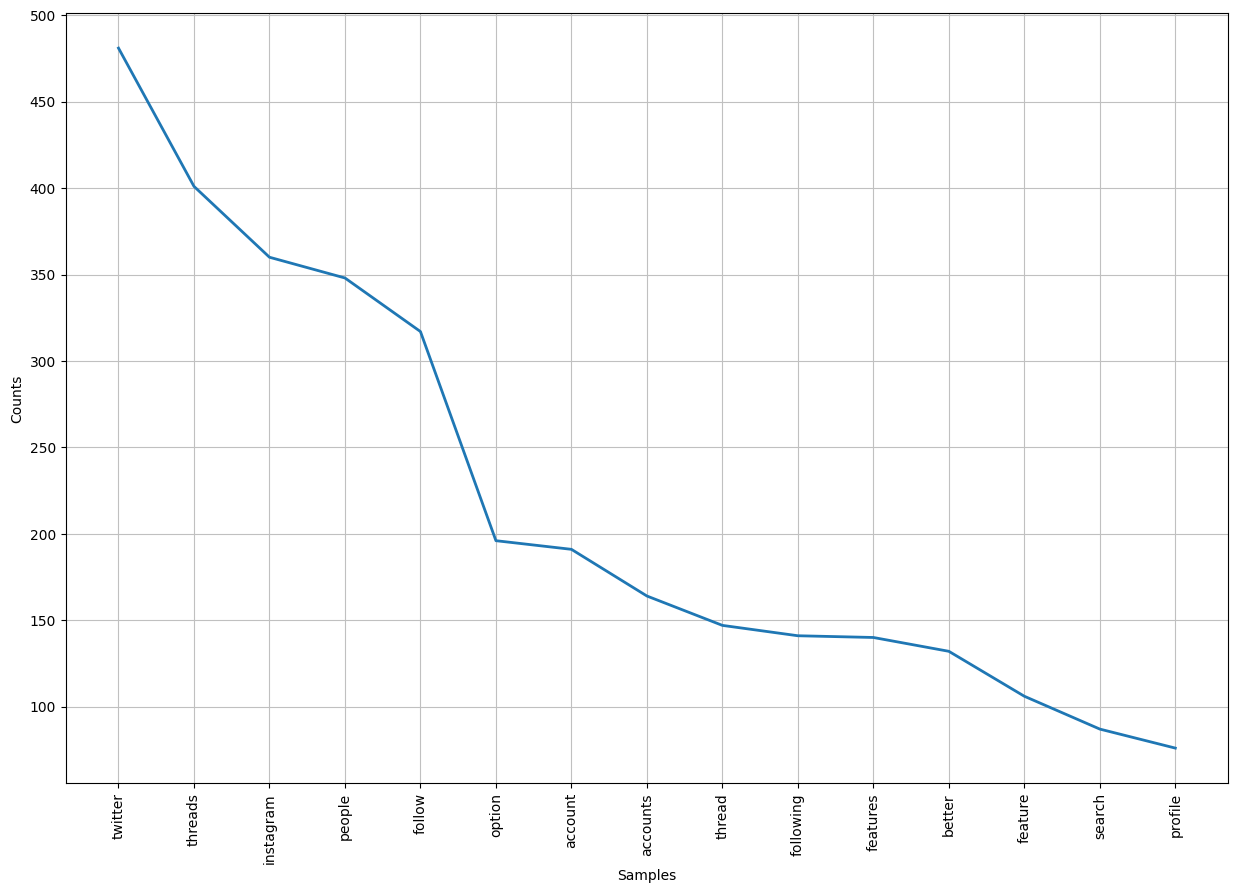

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize=(15, 10))
freq_neutral.plot(15)

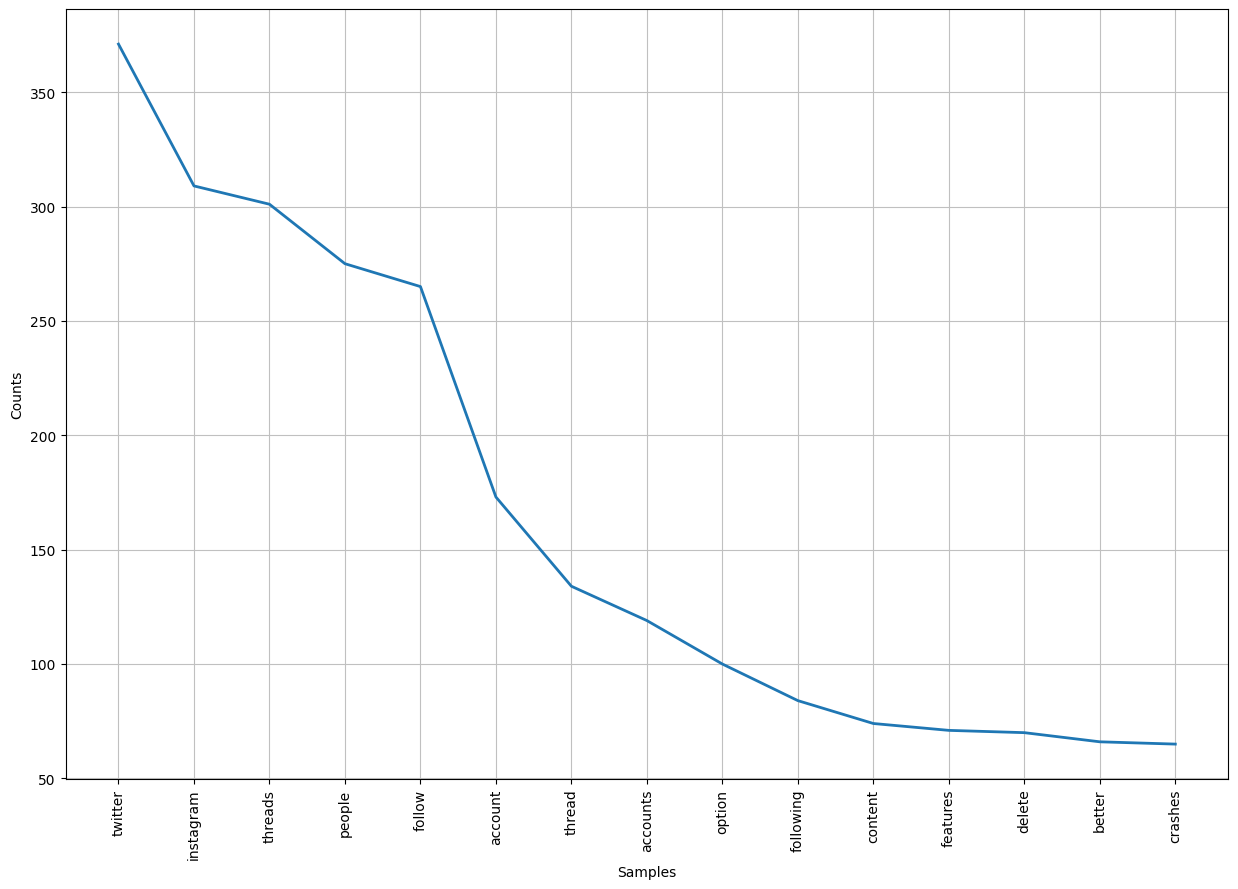

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize=(15, 10))
freq_dissatisfied.plot(15)

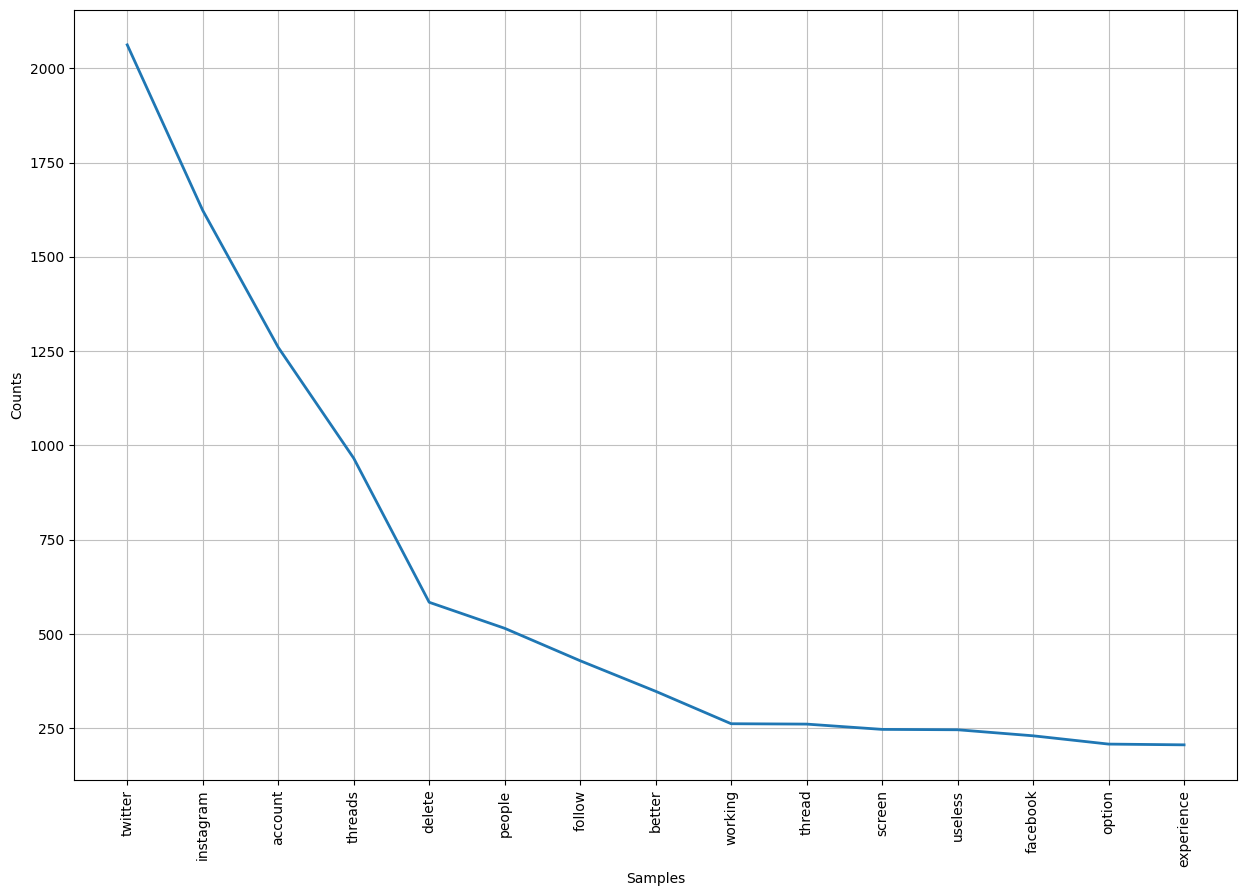

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize=(15, 10))
freq_verydissatisfied.plot(15)

Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

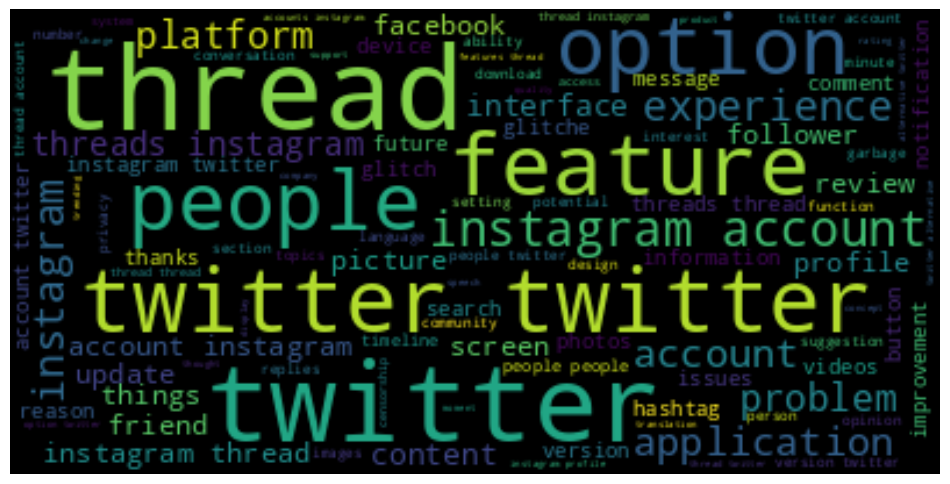

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(noun))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



---


Sentiment Analysis

---



In [ ]:
# import library for sntiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sm = SentimentIntensityAnalyzer()

In [ ]:
sm.polarity_scores("thrad is so bad")

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6696}

In [ ]:
print(sm.polarity_scores("Thread is an amazing app"))

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}


In [ ]:
print(sm.polarity_scores("Thread is AMAZING. But the the theme is not good."))

{'neg': 0.224, 'neu': 0.577, 'pos': 0.199, 'compound': -0.0881}


In [ ]:
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,2
1,Pretty good for a first launch!! Its easy to u...,3
2,"For a brand new app, it's very well optimized....",3
3,"Great app with a lot of potential! However, th...",3
4,"The app is good, but it needs a lot of functio...",3


In [ ]:
df["score"] = df["review_description"].apply(lambda review_description : sm.polarity_scores(review_description))

In [ ]:
# extract only compound score
df["rating_score"] = df["score"].apply(lambda x: x["compound"])

In [ ]:
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,2
1,Pretty good for a first launch!! Its easy to u...,3
2,"For a brand new app, it's very well optimized....",3
3,"Great app with a lot of potential! However, th...",3
4,"The app is good, but it needs a lot of functio...",3




---

Model

---



In [ ]:
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,2
1,Pretty good for a first launch!! Its easy to u...,3
2,"For a brand new app, it's very well optimized....",3
3,"Great app with a lot of potential! However, th...",3
4,"The app is good, but it needs a lot of functio...",3


In [ ]:
col = ['review_description', 'rating']
df = df[col]

df.isnull().sum()

review_description    0
rating                0
dtype: int64

In [ ]:
df.columns = ['review_description', 'rating']
df['rating_id'] = df['rating'].factorize()[0]

df.head()

,review_description,rating,rating_id
0,Meh. Not the greatest experience on a Chromebo...,2,0
1,Pretty good for a first launch!! Its easy to u...,3,1
2,"For a brand new app, it's very well optimized....",3,1
3,"Great app with a lot of potential! However, th...",3,1
4,"The app is good, but it needs a lot of functio...",3,1


In [ ]:
encoded_data, mapping_index = df['rating'].factorize()
print(encoded_data)
print(mapping_index)

[0 1 1 ... 2 2 2]
Int64Index([2, 3, 1, 5, 4], dtype='int64')


<Axes: xlabel='rating'>

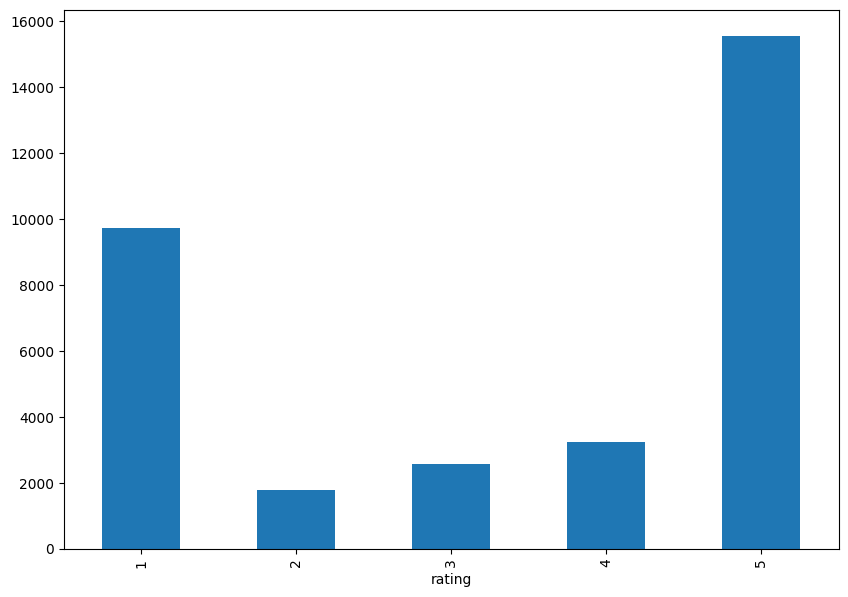

In [ ]:
fig = plt.figure(figsize=(10,7))
df.groupby('rating').review_description.count().plot.bar()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='latin-1',
    ngram_range=(1,2),
    stop_words='english'
)

features = tfidf.fit_transform(df.review_description).toarray()
labels = df.rating_id

features.shape

(32910, 6959)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(
    df['review_description'],
    df['rating_id'],
    random_state=0
)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
sample1 = df.sample(1)
print(sample1.rating)
print(df.review_description[sample1.index[0]])

7788    1
Name: rating, dtype: int64
Cannot login with Google or email


In [ ]:
pred = clf.predict(count_vect.transform([df.review_description[sample1.index[0]]]))
print(mapping_index[pred][0])

NameError: ignored

In [ ]:
sample2 = df.sample(1)
print(sample2.rating)
print(df.review_description[sample2.index[0]])

5187    5
Name: rating, dtype: int64
I have installed today It's looks like instragram twitter alternative app, I don't know how was that my experience


In [ ]:
pred = clf.predict(count_vect.transform([df.review_description[sample2.index[0]]]))
print(mapping_index[pred][0])

1


In [ ]:
pred = clf.predict(count_vect.transform([df.review_description[14422]]))

print(mapping_index[pred][0])

5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

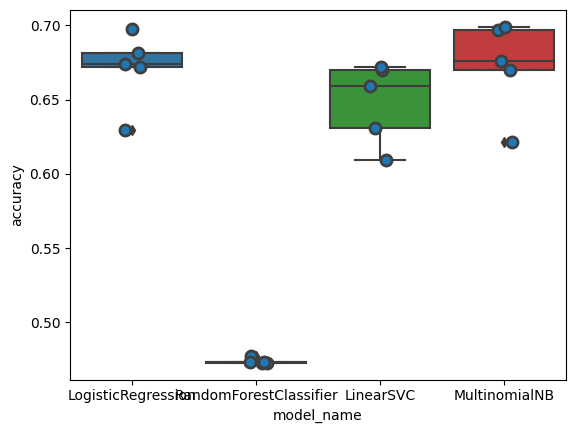

In [ ]:
# find the best model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),
    LinearSVC(),
    MultinomialNB()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)

    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.648162
LogisticRegression        0.670890
MultinomialNB             0.672592
RandomForestClassifier    0.473959
Name: accuracy, dtype: float64

In [ ]:
# df['rating_id'] = df['rating'].factorize()[0]
rating_id_df = df[['rating', 'rating_id']].drop_duplicates().sort_values('rating_id')
rating_to_id = dict(rating_id_df.values)
id_to_rating = dict(rating_id_df[['rating_id', 'rating']].values)
df.head()

,review_description,rating,rating_id
0,Meh. Not the greatest experience on a Chromebo...,2,0
1,Pretty good for a first launch!! Its easy to u...,3,1
2,"For a brand new app, it's very well optimized....",3,1
3,"Great app with a lot of potential! However, th...",3,1
4,"The app is good, but it needs a lot of functio...",3,1


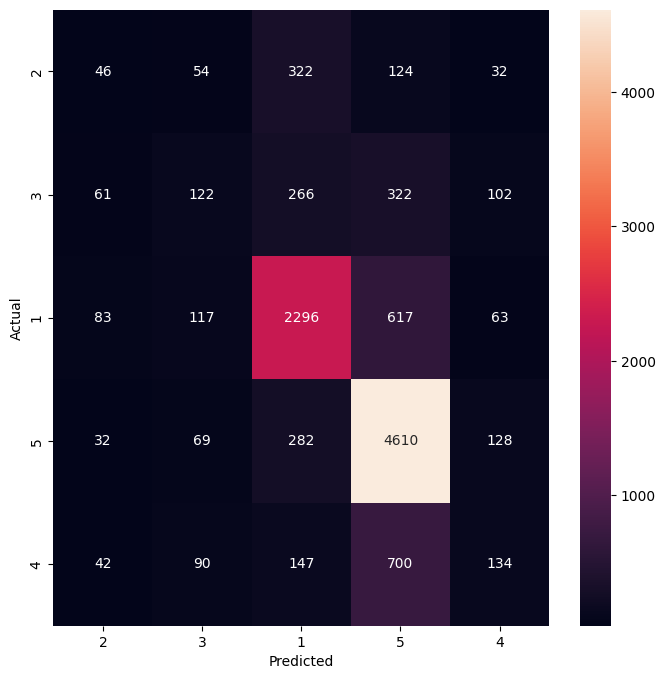

In [ ]:
from sklearn.svm import LinearSVC
import seaborn as sns

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=rating_id_df.rating.values, yticklabels=rating_id_df.rating.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics

# Assuming df['rating'] contains string labels, if not, convert them to strings
unique_labels = list(map(str, df['rating'].unique()))

print(metrics.classification_report(y_test, y_pred, target_names=unique_labels))

              precision    recall  f1-score   support

           2       0.17      0.08      0.11       578
           3       0.27      0.14      0.18       873
           1       0.69      0.72      0.71      3176
           5       0.72      0.90      0.80      5121
           4       0.29      0.12      0.17      1113

    accuracy                           0.66     10861
   macro avg       0.43      0.39      0.39     10861
weighted avg       0.60      0.66      0.62     10861

